In [2]:
!pip install ucimlrepo

In [3]:
import pandas as pd
import numpy as np

In [42]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
abalone.metadata

{'uci_id': 1,
 'name': 'Abalone',
 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone',
 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv',
 'abstract': 'Predict the age of abalone from physical measurements',
 'area': 'Biology',
 'tasks': ['Classification', 'Regression'],
 'characteristics': ['Tabular'],
 'num_instances': 4177,
 'num_features': 8,
 'feature_types': ['Categorical', 'Integer', 'Real'],
 'demographics': [],
 'target_col': ['Rings'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1994,
 'last_updated': 'Mon Aug 28 2023',
 'dataset_doi': '10.24432/C55C7W',
 'creators': ['Warwick Nash',
  'Tracy Sellers',
  'Simon Talbot',
  'Andrew Cawthorn',
  'Wes Ford'],
 'intro_paper': None,
 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of r

In [44]:
X = X.reset_index()

In [54]:
# replace M, F and I with numerical values
sex_list = []


for index, row in X.iterrows():
    sex = row['Sex']
    if sex == 'M':
        sex_list.append(2)
    elif sex == 'F':
        sex_list.append(1)
    elif sex == 'I':
        sex_list.append(0.5)

sex_list

[2,
 2,
 1,
 2,
 0.5,
 0.5,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 0.5,
 1,
 2,
 2,
 2,
 0.5,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 0.5,
 0.5,
 0.5,
 0.5,
 2,
 1,
 0.5,
 1,
 0.5,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 0.5,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 0.5,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 0.5,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 0.5,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 0.5,
 1,
 2,
 0.5,
 0.5,
 0.5,
 0.5,
 2,
 2,
 2,
 1,
 1,
 0.5,
 0.5,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 0.5,
 0.5,
 0.5,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 0.5,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 0.5,
 0.5,
 1,
 0.5,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 0.5,
 2,
 1,
 1,
 1,
 1,
 1,
 0.5,
 1,
 1,
 0.5,
 1,
 1,
 2,
 2,


In [19]:
# remove the male female classification
X = X.drop('Sex', axis='columns')

In [55]:
# add numerical values of sex
X = X.assign(Sex=sex_list)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.50,
    random_state=35,
)

# Cross Validation

Cross validation is the process of selecting internal batches within the entire dataset, selecting one batch and using it is a validation set. This helps prevent overfitting, making sure the model picks the correct trends.

In [7]:
from sklearn.model_selection import cross_val_score

In [17]:
scaler = StandardScaler()

In [57]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
mse = cross_val_score(
    model, X_train, y_train,
    scoring='neg_mean_squared_error',
    cv=10,
)

In [60]:
np.mean(mse)

-5.008666386564554

In [63]:
y_pred = model.predict(X_test)

In [29]:
import seaborn as sns

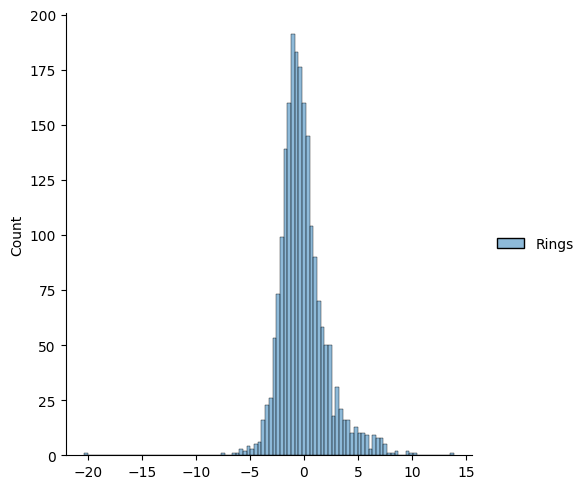

In [64]:
sns.displot(y_test - y_pred)

In [36]:
from sklearn.metrics import r2_score

In [65]:
r2_score(y_test, y_pred)

0.5262341072812003